# Perceptron and MLP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

## Loading the data

In [2]:
data_path = 'cleaned_titanic_dataset.csv'

# Load the dataset
df = pd.read_csv(data_path)
df.reset_index(drop=True, inplace=True)

In [3]:
# Get feature and target variables
y = df['survived']
X = df.drop('survived', axis=1)

In [4]:
# Get categorical and numerical columns
categorical_cols = ['pclass', 'sex', 'embarked']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [5]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='drop'
)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state = 42, max_iter = 1000, solver = 'adam', activation = 'relu'))
])

In [8]:
# Train the model
model = pipeline.fit(X_train, y_train)

Accuracy: 0.7867647058823529
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.81      0.66      0.73        59

    accuracy                           0.79       136
   macro avg       0.79      0.77      0.78       136
weighted avg       0.79      0.79      0.78       136



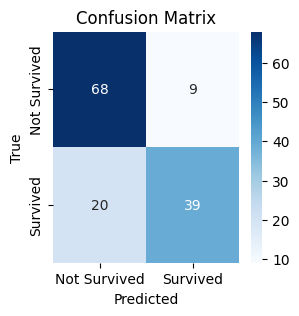

In [9]:
# Plot metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state = 42, max_iter = 1000, solver = 'adam', activation = 'relu', hidden_layer_sizes=(100, 50, 25)))
])

In [11]:
# Train the model
model = pipeline.fit(X_train, y_train)

Accuracy: 0.8088235294117647
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.82      0.71      0.76        59

    accuracy                           0.81       136
   macro avg       0.81      0.80      0.80       136
weighted avg       0.81      0.81      0.81       136



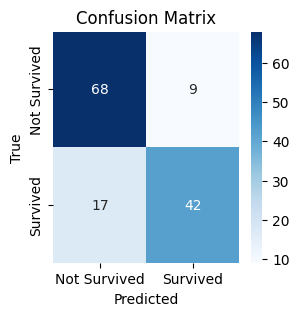

In [12]:
# Plot metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()